# Data-driven tunings

author: laquitainesteeve@gmail.com

tested on Apple M4 16GB RAM (no GPU required)

## Setup 

activate `fisher_info_limits`

In [ ]:
# import packages
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# setup project path
main_dir = '/Users/steeve_laquitaine/Desktop/fisher-limits/code/fisher-info-limits/'
os.chdir(main_dir)

# import custom package
import ssiProjectModule as ssiMod

# setup parameters
theta_step = 2
stim = np.arange(0, 360, theta_step) # stimulus direction space

## Functions

In [ ]:
def gaussian(stim, amp, sigma):
    return amp * np.exp(-0.5 * ((stim - 180)**2)/(sigma**2))

## Fit

### V1 orientation tuning 

- std of 14.73 deg - max firing rate of 52.14 spikes/sec - for moving bar, <u>cat</u> (Dayan and Abott, Theoretical Neuroscience textbook, p15)
- std of 17 deg across layers for <u>Ferret</u> (Marcelo A Montemurro and Stefano Panzeri, NeurIPS, 2004)
- std on average: (14.73 + 17) /2 ~ 16 deg

amplitude: 52.03815256858668
std: 16.05683659226965
FWHM: 37.81096066726301


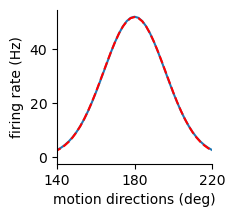

In [ ]:
# setup parameters
AMPLITUDE = 1050     # ~52 spikes/secs
WIDTH = 0.077        # ~16 degrees based on data from literature
BASELINE = 0

# von mises tuning curve
tuning_c = ssiMod.VON_MISES(th=stim, a=AMPLITUDE, th_0=180, s=WIDTH, baseline=BASELINE)

# fit
params, pcov = curve_fit(f=gaussian, xdata=stim, ydata=tuning_c, p0=(100, 10), bounds=(-np.inf, np.inf))

# get tuning parameters
amplitude, std = params
fwhm = 2 * np.sqrt(2*np.log(2)) * params[1]

# get best gaussian tuning 
gaussian_tuning_v1_cat = gaussian(stim, amplitude, std)

# plot fit
fig, ax = plt.subplots(1,1, figsize=(2,2))
ax.plot(stim,tuning_c, label='von mises tuning curve');
ax.plot(stim, gaussian(stim, amplitude, std), 'r', linestyle='--', label='gaussian fit');
ax.set_xlabel("motion directions (deg)")
ax.set_ylabel("firing rate (Hz)")

# aesthethics
ax.set_xticks([180-40, 180, 180+40])
ax.set_xticklabels([180-40, 180, 180+40])
ax.set_xlim([180-40, 180+40])

# report
print("amplitude:", amplitude)
print("std:", std)
print("FWHM:", fwhm)

### MT direction tuning

- std of 35 deg (FWHM mean: 80 deg) for moving slit and random dot kinematogram (RDK) - max firing rate: 19 spikes/secs for moving slit, RDK, moving spot, in <u>macaque</u> (Albright, Jneurophy, 1984)
- std of 28 deg across species (Marcelo A Montemurro and Stefano Panzeri, NeurIPS, 2004)
- std on average (35 + 28)/2 ~ 32 deg


amplitude: 19.086585654672685
std: 32.1275128679042
FWHM: 75.65451129833058


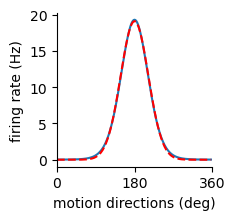

In [115]:
# setup parameters
AMPLITUDE = 780    # 19 spikes/secs 
WIDTH = 0.29       # produces ~75 deg FWHM, 32 deg std
BASELINE = 0

# von mises tuning curve
tuning_c = ssiMod.VON_MISES(th=stim, a=AMPLITUDE, th_0=180, s=WIDTH, baseline=BASELINE)

# fit
params, pcov = curve_fit(f=gaussian, xdata=stim, ydata=tuning_c, p0=(100, 10), bounds=(-np.inf, np.inf))

# get tuning parameters
amplitude, std = params
fwhm = 2 * np.sqrt(2*np.log(2)) * params[1]

# get best gaussian tuning 
gaussian_tuning_mt_primate = gaussian(stim, amplitude, std)

# plot fit
fig, ax = plt.subplots(1,1, figsize=(2,2))
ax.plot(stim,tuning_c, label='von mises tuning curve');
ax.plot(stim, gaussian(stim, amplitude, std), 'r', linestyle='--', label='gaussian fit');
ax.set_xlabel("motion directions (deg)")
ax.set_ylabel("firing rate (Hz)")

# aesthethics
ax.set_xticks([0, 180, 360])
ax.set_xticklabels([0, 180, 360])
ax.set_xlim([0, 360])

# report
print("amplitude:", amplitude)
print("std:", std)
print("FWHM:", fwhm)

### On average

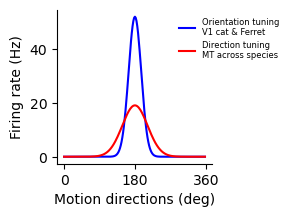

In [118]:
fig, ax = plt.subplots(1,1, figsize=(2,2))

# V1 orientation tuning (cat)
ax.plot(stim, gaussian_tuning_v1_cat, label='Orientation tuning \nV1 cat & Ferret', color='blue')

# MT direction tuning (primate)
ax.plot(stim, gaussian_tuning_mt_primate, label='Direction tuning \nMT across species', color='red')

ax.set_xlabel("Motion directions (deg)");
ax.set_ylabel("Firing rate (Hz)");
ax.set_xticks([0, 180, 360])
ax.set_xticklabels([0, 180, 360])
plt.legend(frameon=False, fontsize=6, loc='upper right', bbox_to_anchor=(1.5, 1));

## References

https://en.wikipedia.org/wiki/Full_width_at_half_maximum